In [19]:
import xarray as xr 
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.stats import pearsonr

In [4]:
# Open HadISST 
sst_ds = xr.open_dataset('/g/data/w40/rl5183/hadisst.1870_2017_1.5x1.5.nc')
sst = sst_ds.sst.sel(lat=slice(-30,30)).sel(lon=slice(120,270)).sel(time=slice('1900-01', '2014-12'))
# Detrend 
sst_detrend = np.apply_along_axis(func.detrend_2step, 0, sst)
sst_dt = xr.DataArray(sst_detrend, coords=sst.coords, attrs=sst.attrs)
# Calculate Nino34 index
nino34 = func.nino34_index(sst_dt, '1979-01', '2008-12')
# Calculate monthly anomalies 
clim = sst_dt.sel(time=slice('1979-01', '2008-12')).groupby('time.month').mean()
anom = sst_dt.groupby('time.month') - clim

In [8]:
en_raw, la_raw = func.sst_comp(nino34, sst_dt, 'DJF')

In [9]:
en_anom, la_anom = func.sst_comp(nino34, anom, 'DJF')

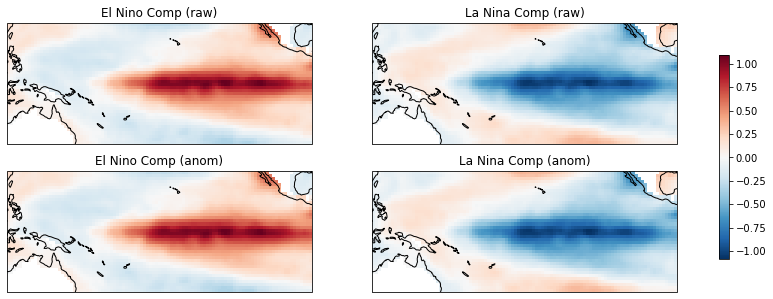

In [14]:
fig = plt.figure(figsize = (15,5)) 
axs = []
ax = fig.add_subplot(221, projection=ccrs.PlateCarree(180))
im = en_raw.plot(ax=ax, cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino Comp (raw)')
axs.append(ax)
ax = fig.add_subplot(222, projection=ccrs.PlateCarree(180))
im = la_raw.plot(ax=ax, cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina Comp (raw)')
axs.append(ax)
ax = fig.add_subplot(223, projection=ccrs.PlateCarree(180))
im = en_anom.plot(ax=ax, cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino Comp (anom)')
axs.append(ax)
ax = fig.add_subplot(224, projection=ccrs.PlateCarree(180))
im = la_anom.plot(ax=ax, cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina Comp (anom)')
axs.append(ax)
cbar = plt.colorbar(im, ax=axs, shrink=0.75, pad=0.05)
#plt.savefig('enso_comp_nino34_eof.jpg', bbox_inches='tight', dpi=300)

In [16]:
def comp_pattern_cor(comp1, comp2):
    # Make 1D
    comp1_1d = comp1.values.flatten()
    comp2_1d = comp2.values.flatten()
    # Mask
    comp1_1d = comp1_1d[np.isfinite(comp1_1d)]
    comp2_1d = comp2_1d[np.isfinite(comp2_1d)]
    # Correlation
    return pearsonr(comp1_1d, comp2_1d)

In [20]:
en = comp_pattern_cor(en_raw, en_anom)
la = comp_pattern_cor(la_raw, la_anom)

In [21]:
en

(0.9999750169273536, 0.0)

In [22]:
la

(0.9999529245042393, 0.0)